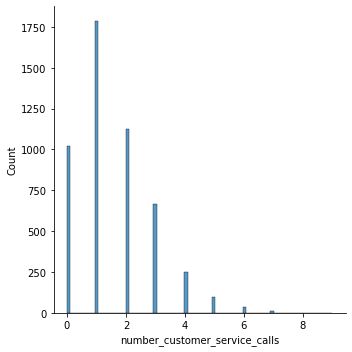

In [79]:
#1. Построить гистограмму количества звонков в техническую поддержку
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import math

data = pd.read_csv('churn.csv')

sns.displot(data["number_customer_service_calls"])

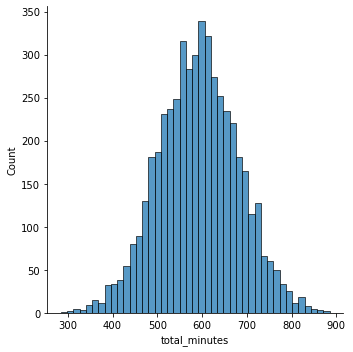

In [80]:
#2 Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международны)
data['total_minutes'] = data['total_night_minutes']+data['total_intl_minutes']+data['total_day_minutes']+data['total_eve_minutes']
sns.displot(data['total_minutes'])

In [81]:
#3. Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции 
#(https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку

from scipy.stats import norm
print("Коэффициент Пирсона: ",sp.stats.pearsonr(data['total_minutes'], data['number_customer_service_calls']))

print("Коэффициент Пирсона (без встроенных функций): ",sum((data['total_minutes']-data['total_minutes'].mean())*(data['number_customer_service_calls']-data['number_customer_service_calls'].mean()))/math.sqrt(sum((data['total_minutes']-data['total_minutes'].mean())**2)*sum((data['number_customer_service_calls']-data['number_customer_service_calls'].mean())**2)))


Коэффициент Пирсона:  (-0.011407910827441393, 0.4199628716756915)
Коэффициент Пирсона (без встроенных функций):  -0.011407910827441137


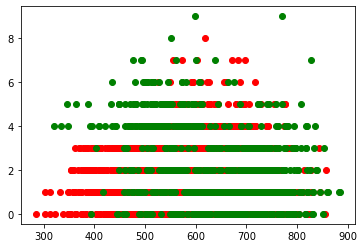

In [82]:
#4. Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки 
#в зависимости от оттока абонента

plt.scatter(data[data['churned']==False]['total_minutes'], data[data['churned']==False]['number_customer_service_calls'],color='r')
plt.scatter(data[data['churned']==True]['total_minutes'], data[data['churned']==True]['number_customer_service_calls'], color='g')

In [83]:
#5. Вывести top-5 самых много и самых мало говорящих клиентов

# df.sort_values(by='total_minutes', ascending=False)
print('top-5 самых много говорящих клиентов:\n',data.sort_values(by='total_minutes', ascending=False).head(5)[["phone_number","total_minutes"]])
print('top-5 самых мало говорящих клиентов:\n',data.sort_values(by='total_minutes', ascending=False).tail(5)[["phone_number","total_minutes"]])


top-5 самых много говорящих клиентов:
      phone_number  total_minutes
985      345-9140          885.0
289      352-6976          882.2
3205     345-3787          860.2
4991     410-3888          858.2
4271     370-4667          857.4
top-5 самых мало говорящих клиентов:
      phone_number  total_minutes
992      375-8934          313.3
1986     405-9233          313.0
3779     362-8044          303.2
1233     380-5246          301.5
648      331-3174          284.3


In [84]:
#6. Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата

data['a']=1
df = data.groupby(by="state").sum()
data.drop(columns=['a'])
df["average_charge"] = df["total_day_minutes"]/df["total_day_charge"]
df["churn_stat"] = df["churned"]/df["a"]
df[["average_charge",'churn_stat']]

,average_charge,churn_stat
state,,
AK,5.882273,0.069444
AL,5.882303,0.104839
AR,5.882261,0.173913
AZ,5.882241,0.101124
CA,5.882257,0.269231
CO,5.882241,0.114583
CT,5.882287,0.161616
DC,5.882150,0.102273
DE,5.882227,0.159574


In [85]:
#7. перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалите колонку, 
#если вы делаете решение на pyspark
pd.get_dummies(data['state'])

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
#8. Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации 
#(убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)
from sklearn.model_selection import train_test_split
data1=data
data1=data1.drop (columns = ['phone_number', 'area_code','international_plan','voice_mail_plan','total_minutes','total_intl_charge',
                        'total_night_charge','total_eve_charge','total_day_charge','number_vmail_messages',])

data1 = pd.get_dummies(data1, ['state'])

X, y = data1[[  'account_length', 'total_day_minutes', 'total_eve_minutes', 'total_day_calls',
           'total_night_minutes', 'total_intl_minutes', 'total_intl_minutes',
           'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
           'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
           'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
           'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
           'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
           'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
           'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
           'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
           'state_WY']], data1['churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
#9. Привести данные к одному масштабу при помощи StandardScaler в случае Pandas.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [102]:
#10. Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке
from sklearn.linear_model import LogisticRegression
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)
predicted_y = logreg_clf.predict(X_test)
print('Точность:', logreg_clf.score(X_test, y_test))

Точность: 0.846
